In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("songs.csv")
df.head()

,Song Name,Artist,Genre,Popularity
0,Raat Pyar,Jubin Nautiyal,Bollywood,89
1,Zindagi Mere,KK,Folk,98
2,Mere Din,Arijit Singh,Folk,94
3,Raat Mohabbat,Sonu Nigam,Hip-Hop,91
4,Jaan Jaan,KK,Indie,97


In [3]:
df.info()  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Song Name   10000 non-null  object
 1   Artist      10000 non-null  object
 2   Genre       10000 non-null  object
 3   Popularity  10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [4]:
df.describe()  # Statistical summary of numeric columns

,Popularity
count,10000.00000
mean,90.00820
std,6.06973
min,80.00000
25%,85.00000
50%,90.00000
75%,95.00000
max,100.00000


In [5]:
df.isnull().sum()  # Check for missing values

Song Name     0
Artist        0
Genre         0
Popularity    0
dtype: int64

In [6]:
df = df.dropna()  # Drop rows with missing values
# Or: df.fillna("Unknown", inplace=True)  # Fill missing data

In [7]:
df.dtypes  # Check the data types of each column

Song Name     object
Artist        object
Genre         object
Popularity     int64
dtype: object

In [8]:
df.nunique()  # Count of unique values for each column

Song Name     100
Artist          8
Genre           8
Popularity     21
dtype: int64

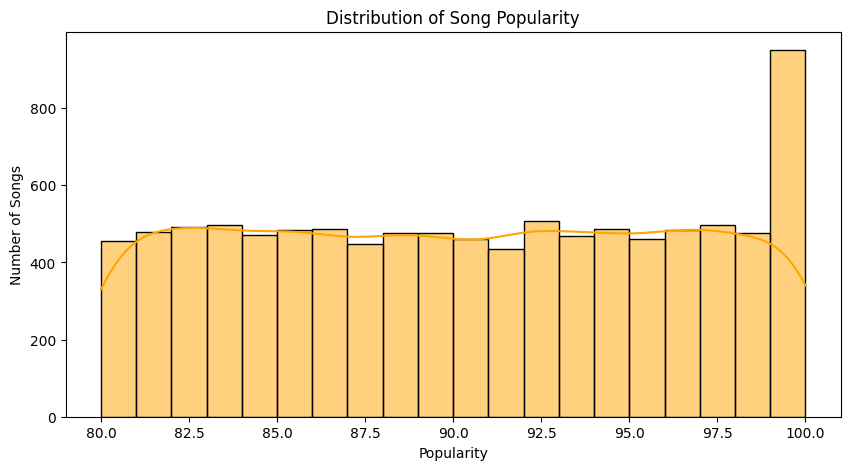

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='orange')
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\2678188226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")


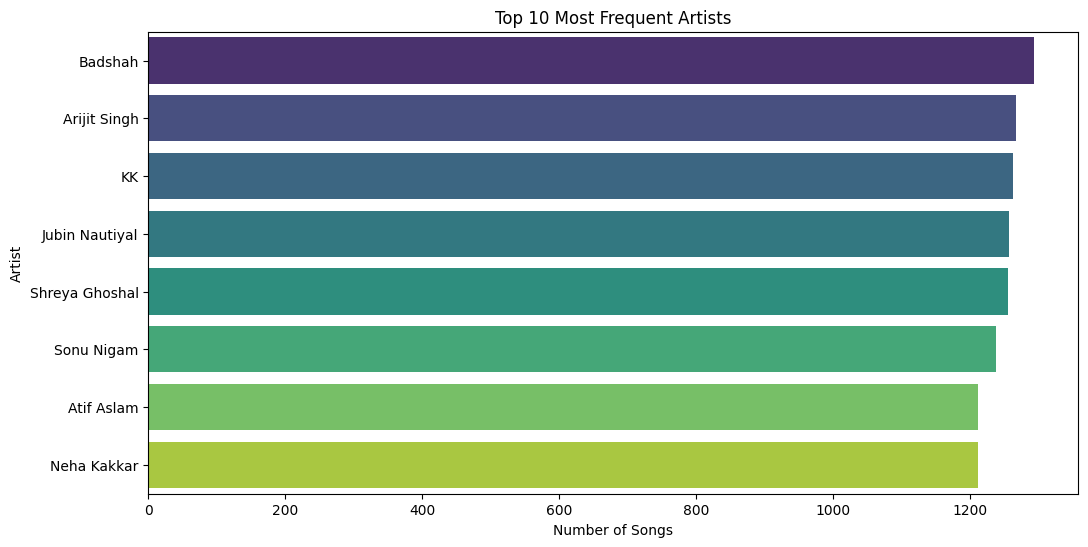

In [10]:
top_artists = df['Artist'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title("Top 10 Most Frequent Artists")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\1238257397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Genre", order=df['Genre'].value_counts().index, palette="Set2")


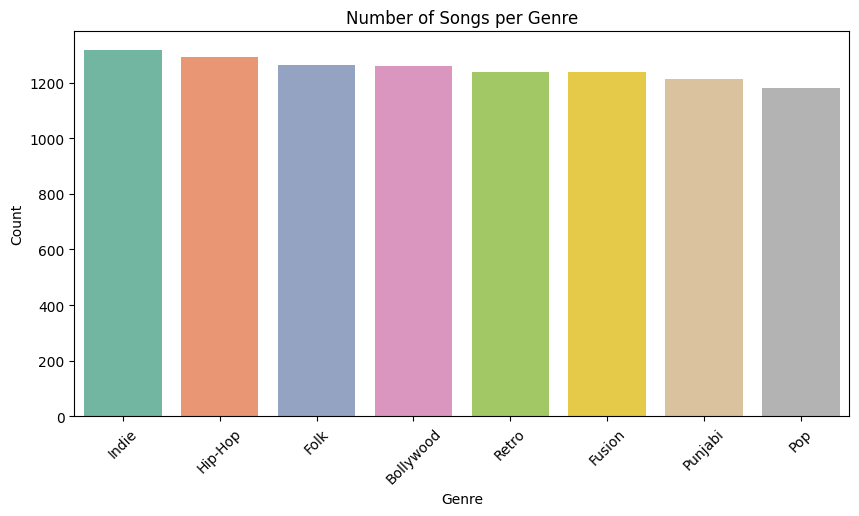

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Genre", order=df['Genre'].value_counts().index, palette="Set2")
plt.title("Number of Songs per Genre")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\387023818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="coolwarm")


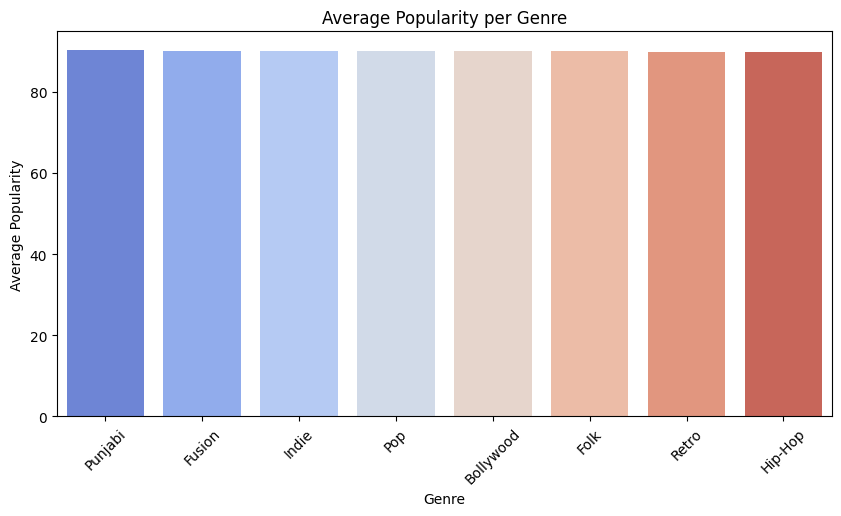

In [12]:
plt.figure(figsize=(10, 5))
genre_popularity = df.groupby("Genre")["Popularity"].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette="coolwarm")
plt.title("Average Popularity per Genre")
plt.ylabel("Average Popularity")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

In [13]:
top_songs = df.sort_values(by="Popularity", ascending=False).head(10)
top_songs[['Song Name', 'Artist', 'Popularity']]

,Song Name,Artist,Popularity
8601,Zindagi Tere,Neha Kakkar,100
8013,Mohabbat Tere,Arijit Singh,100
2453,Mere Zindagi,Jubin Nautiyal,100
4192,Zindagi Zindagi,KK,100
2457,Raat Zindagi,KK,100
589,Mohabbat Jaan,Arijit Singh,100
592,Mere Zindagi,Sonu Nigam,100
2463,Mohabbat Tere,Sonu Nigam,100
6596,Dil Raat,Jubin Nautiyal,100
6598,Mere Tere,Atif Aslam,100


In [14]:
most_popular_artist = df.groupby("Artist")["Popularity"].mean().idxmax()
most_popular_artist

'Atif Aslam'

C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\156111203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Genre", y="Popularity", palette="coolwarm")


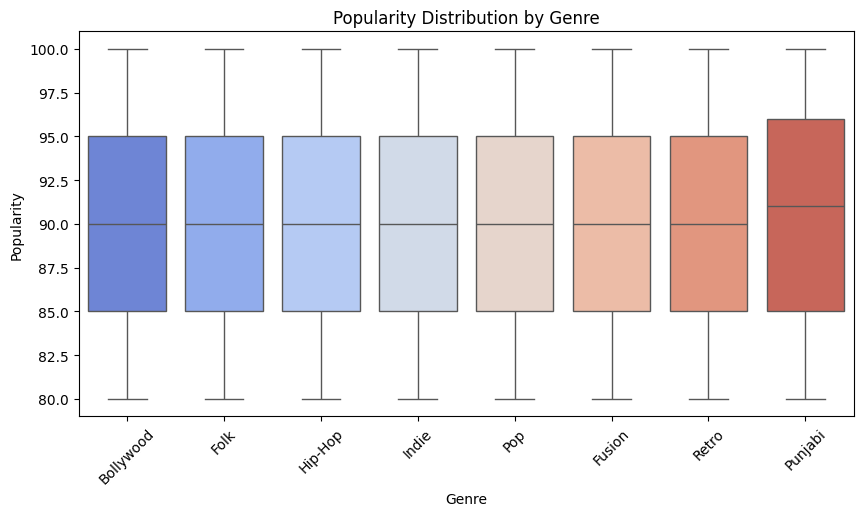

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Genre", y="Popularity", palette="coolwarm")
plt.title("Popularity Distribution by Genre")
plt.ylabel("Popularity")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

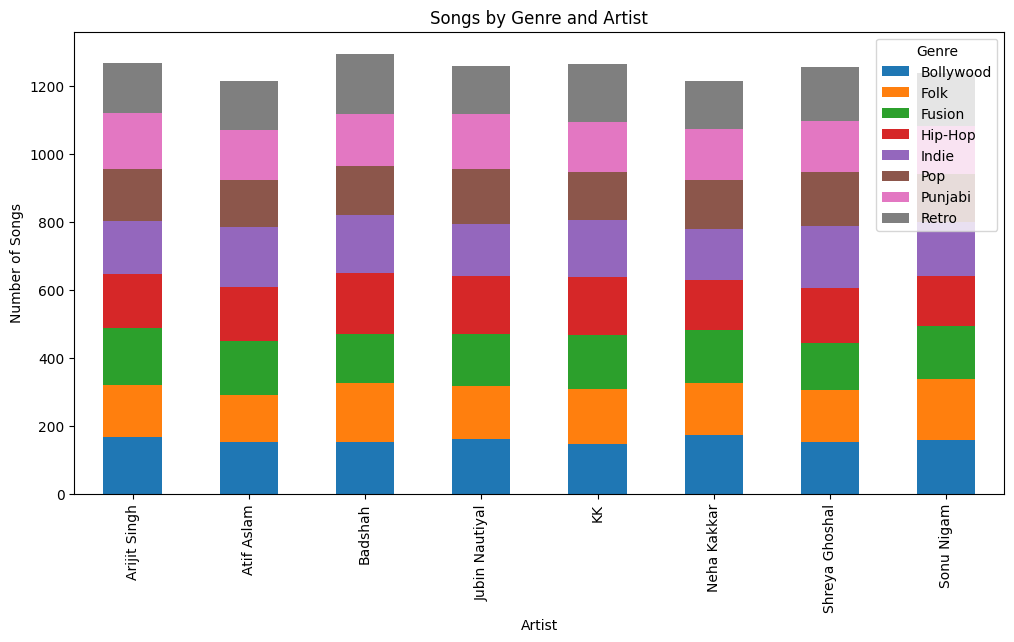

In [16]:
plt.figure(figsize=(12, 6))
song_counts = df.groupby(['Artist', 'Genre']).size().unstack().fillna(0)
song_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Songs by Genre and Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90)
plt.show()

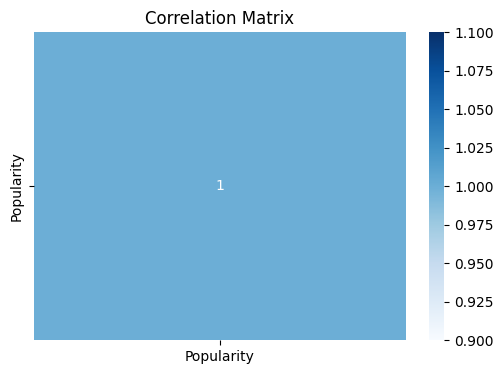

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\3136984277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Genre", y="Popularity", palette="coolwarm")


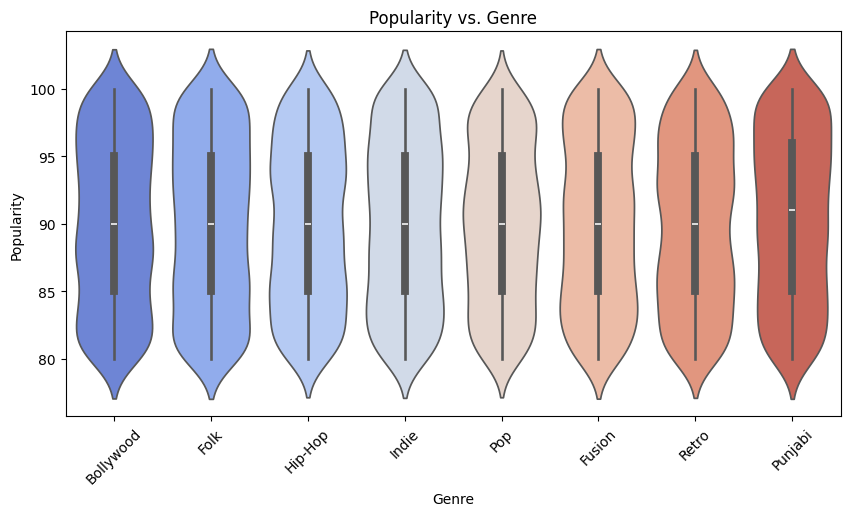

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x="Genre", y="Popularity", palette="coolwarm")
plt.title("Popularity vs. Genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()

In [20]:
most_common_genre = df['Genre'].mode()[0]
most_common_genre

'Indie'

In [21]:
high_popularity_songs = df[df['Popularity'] > 95]
high_popularity_songs[['Song Name', 'Artist', 'Popularity']]

,Song Name,Artist,Popularity
1,Zindagi Mere,KK,98
4,Jaan Jaan,KK,97
8,Tere Mohabbat,Shreya Ghoshal,99
10,Zindagi Pyar,Neha Kakkar,98
20,Raat Mohabbat,Atif Aslam,96
...,...,...,...
9988,Zindagi Ishq,Neha Kakkar,96
9990,Mere Ishq,Arijit Singh,96
9991,Jaan Dil,KK,96
9994,Dil Mere,Sonu Nigam,100


C:\Users\Asus\AppData\Local\Temp\ipykernel_6512\13495589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y='Popularity', palette='coolwarm')


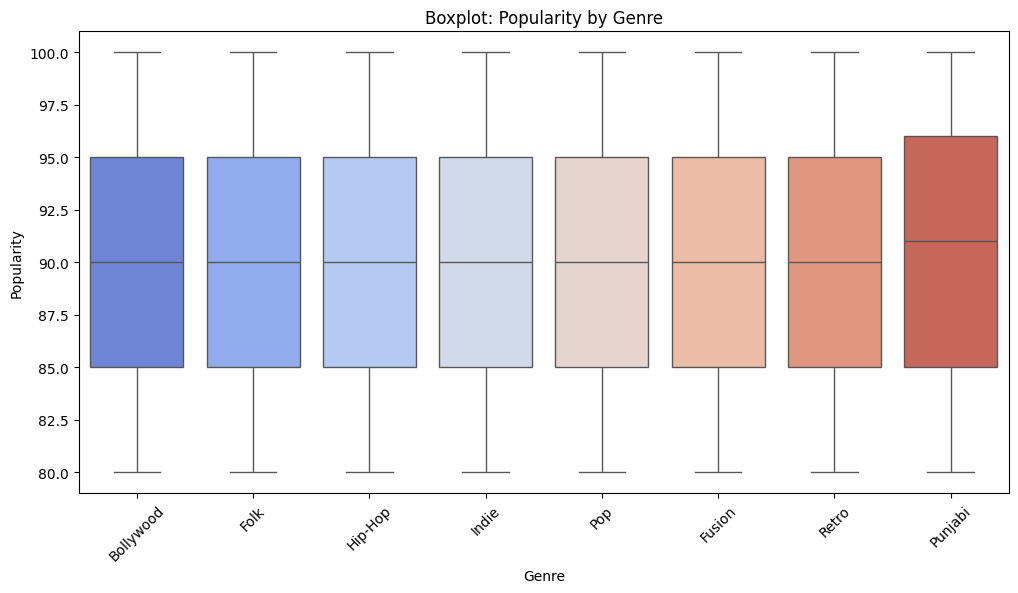

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Popularity', palette='coolwarm')
plt.title('Boxplot: Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()